# Credit Card Fraud Detection Sub-Group 1

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)


2.15.0


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis 

In [46]:
data = pd.read_csv('C:/Users/rawan/OneDrive/Desktop/DDLL/CreditCardFraudDetection/Datasets/FinalCreditCard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(5000, 31)

In [9]:
#checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#Dataset Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5000 non-null   float64
 1   V1      5000 non-null   float64
 2   V2      5000 non-null   float64
 3   V3      5000 non-null   float64
 4   V4      5000 non-null   float64
 5   V5      5000 non-null   float64
 6   V6      5000 non-null   float64
 7   V7      5000 non-null   float64
 8   V8      5000 non-null   float64
 9   V9      5000 non-null   float64
 10  V10     5000 non-null   float64
 11  V11     5000 non-null   float64
 12  V12     5000 non-null   float64
 13  V13     5000 non-null   float64
 14  V14     5000 non-null   float64
 15  V15     5000 non-null   float64
 16  V16     5000 non-null   float64
 17  V17     5000 non-null   float64
 18  V18     5000 non-null   float64
 19  V19     5000 non-null   float64
 20  V20     5000 non-null   float64
 21  V21     5000 non-null   float64
 22  

In [11]:
data['Class'].value_counts()

Class
0    4508
1     492
Name: count, dtype: int64

In [12]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((4508, 31), (492, 31))

# Data Preprocessing

In [13]:
#Class Balancing
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [14]:
#combine
data = pd.concat([fraud, non_fraud], ignore_index=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [15]:
#Class Distribution (after balancing)
data['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

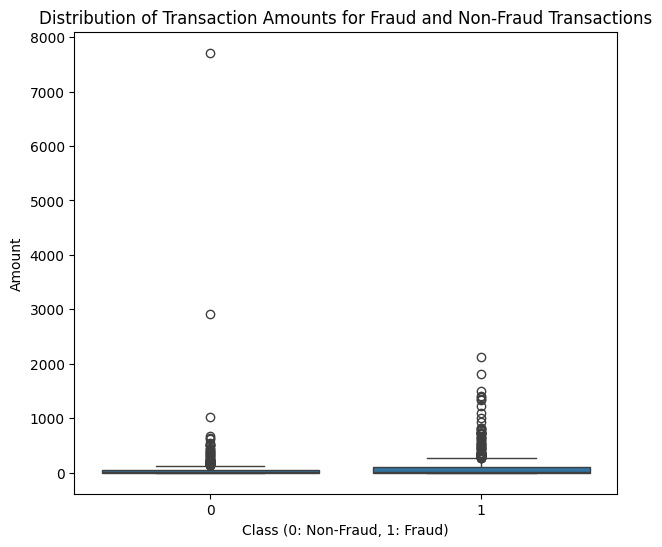

In [20]:
# Visualize the distribution of transaction amounts for fraud and non-fraud transactions
plt.figure(figsize=(7, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Distribution of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

### Feature and Target split 

In [21]:
X = data.drop('Class', axis = 1)
y = data['Class']

### Train-Test Split : 20% data for testing and 80% data for training the model. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [23]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

### Feature Scaling

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#convert to numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train.shape

(787, 30)

In [26]:
#reshaping features
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
#final shape
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

### Build CNN

In [28]:
epochs = 30
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [30]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30


25/25 [==============================] - 3s 25ms/step - loss: 0.6244 - accuracy: 0.7306 - val_loss: 0.5988 - val_accuracy: 0.8680
Epoch 2/30
25/25 [==============================] - 0s 12ms/step - loss: 0.3864 - accuracy: 0.8602 - val_loss: 0.5468 - val_accuracy: 0.8426
Epoch 3/30
25/25 [==============================] - 0s 12ms/step - loss: 0.2873 - accuracy: 0.9009 - val_loss: 0.5091 - val_accuracy: 0.8731
Epoch 4/30
25/25 [==============================] - 0s 12ms/step - loss: 0.2541 - accuracy: 0.9174 - val_loss: 0.4713 - val_accuracy: 0.9137
Epoch 5/30
25/25 [==============================] - 0s 11ms/step - loss: 0.2522 - accuracy: 0.9047 - val_loss: 0.4276 - val_accuracy: 0.9188
Epoch 6/30
25/25 [==============================] - 0s 13ms/step - loss: 0.2130 - accuracy: 0.9187 - val_loss: 0.3839 - val_accuracy: 0.9188
Epoch 7/30
25/25 [==============================] - 0s 10ms/step - loss: 0.2057 - accuracy: 0.9352 - val_loss: 0.3445 - val_accuracy: 0.9442
Epoch 8/30


In [32]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

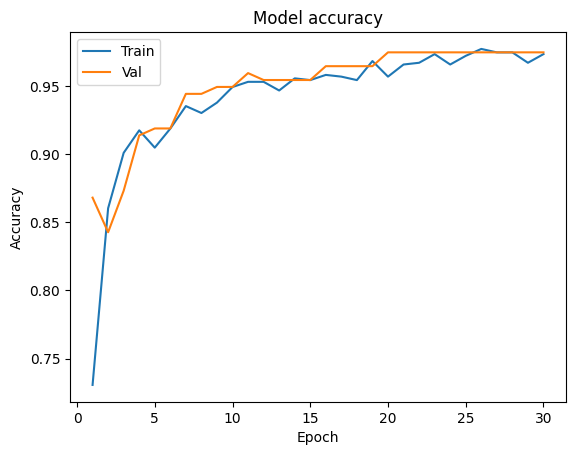

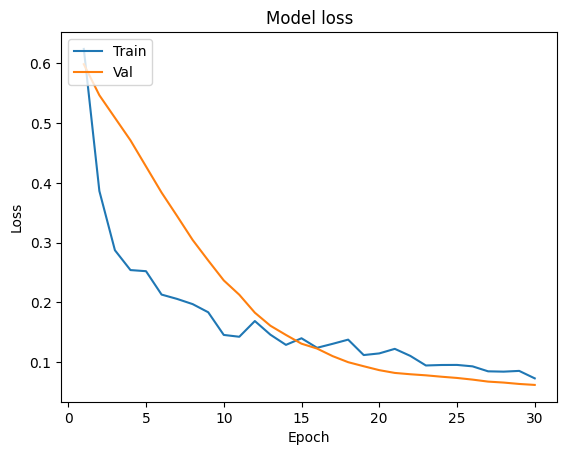

In [33]:
plot_learningCurve(history, epochs)

### Adding MaxPool (for experiment)

In [34]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
25/25 [==============================] - 2s 19ms/step - loss: 1.1084 - accuracy: 0.5235 - val_loss: 0.6562 - val_accuracy: 0.6396
Epoch 2/50
25/25 [==============================] - 0s 11ms/step - loss: 0.8165 - accuracy: 0.6201 - val_loss: 0.6336 - val_accuracy: 0.8223
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.6836 - accuracy: 0.6709 - val_loss: 0.6079 - val_accuracy: 0.8223
Epoch 4/50
25/25 [==============================] - 0s 11ms/step - loss: 0.6386 - accuracy: 0.7357 - val_loss: 0.5768 - val_accuracy: 0.7919
Epoch 5/50
25/25 [==============================] - 0s 11ms/step - loss: 0.5397 - accuracy: 0.7738 - val_loss: 0.5449 - val_accuracy: 0.7970
Epoch 6/50
25/25 [==============================] - 0s 12ms/step - loss: 0.4167 - accuracy: 0.8247 - val_loss: 0.5114 - val_accuracy: 0.8020
Epoch 7/50
25/25 [==============================] - 0s 11ms/step - loss: 0.4557 - accuracy: 0.8247 - val_loss: 0.4758 - val_accuracy: 0.8173
Epoch 8/50
2

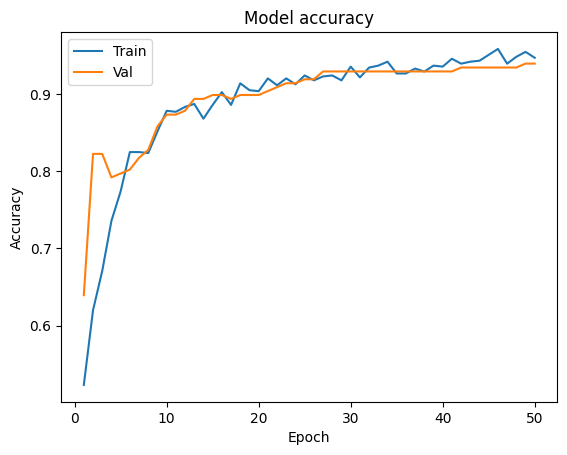

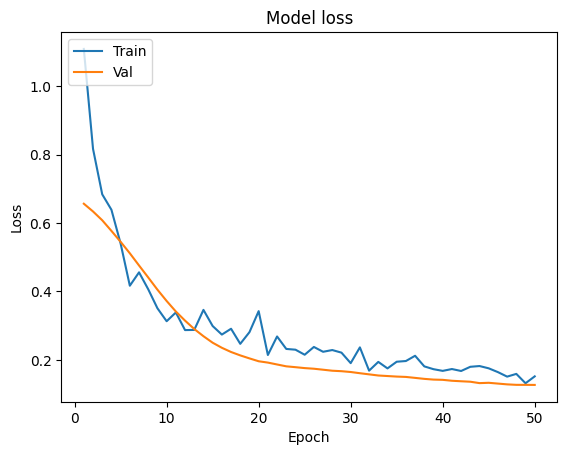

In [35]:
plot_learningCurve(history, epochs)

## Evalute the model 

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

7/7 [==============================] - 0s 2ms/step


In [39]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [40]:
# Print the evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Confusion Matrix:
[[99  0]
 [12 86]]

Precision: 1.0
Recall: 0.8775510204081632
Accuracy: 0.9390862944162437


In [41]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.88      0.93        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



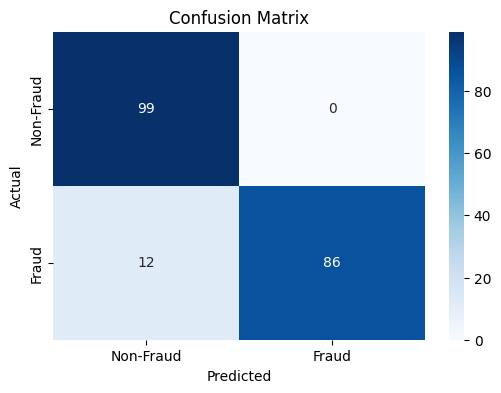

In [42]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()